In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

### 1. Import data

In [3]:
df = pd.read_csv(Path('housing_data.csv'), index_col = 'Id')
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

### 2. drop high null columns

In [4]:
# Select only the column names that contain over 1000 values.
columns = df.count()>1000
columns_true = columns[columns==True].index
len(columns_true)

75

In [5]:
#pick a subset of data columns (>1000) from df
df_low_null_columns = df[columns_true]
df_low_null_columns.shape

(1460, 75)

### 3. drop numeric columns with low price correlation

In [6]:
#select all columns, excluding "y"
df_no_y = df_low_null_columns.loc[:,df_low_null_columns.columns != 'SalePrice']
#find correlation
df_no_y.corrwith(df_low_null_columns['SalePrice'])
#use absolute values
correlations = abs(df_no_y.corrwith(df_low_null_columns['SalePrice']))

In [7]:
#drop correlations lower than 0.05
columns = correlations>0.05
columns_low_corr = columns[columns==False].index
len(columns_low_corr)

7

In [8]:
#drop low corr columns from the low null columns dataframe
df_high_corr = df_low_null_columns.drop(columns_low_corr, axis=1)
df_high_corr.shape

(1460, 68)

### 4. Review outliers, numeric columns only

In [9]:
numeric_columns = df_high_corr.select_dtypes(exclude=object).columns
pdf = df_high_corr[numeric_columns].copy()
pdf['SalePrice'] = df['SalePrice']

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<ipython-input-10-00ae9c587e46>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-10-00ae9c587e46>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
C:\Us

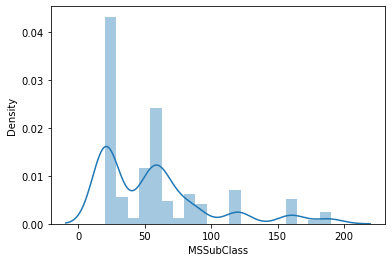

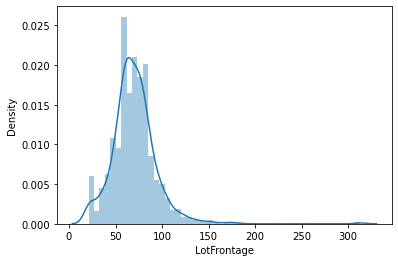

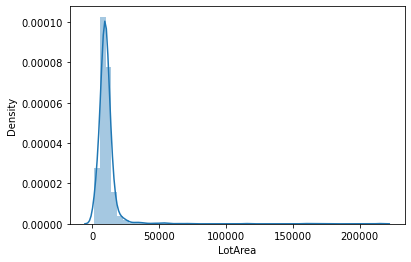

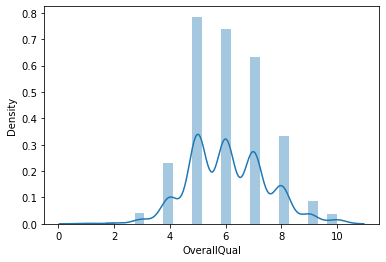

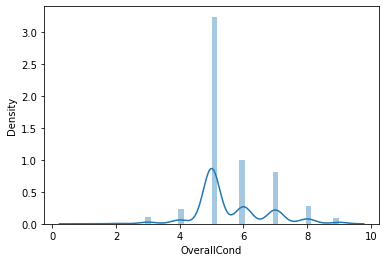

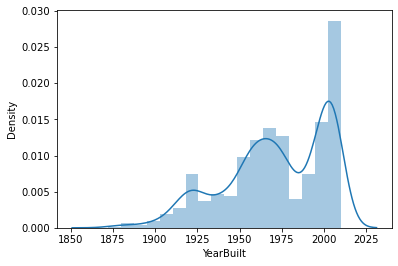

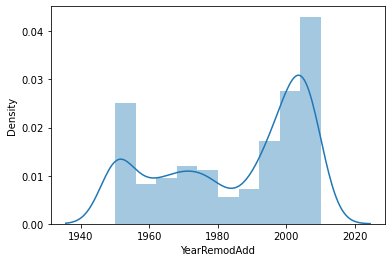

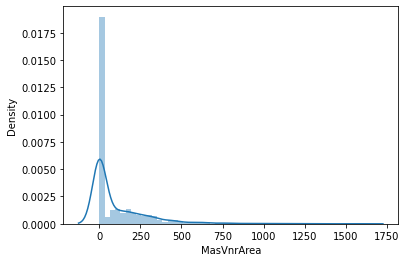

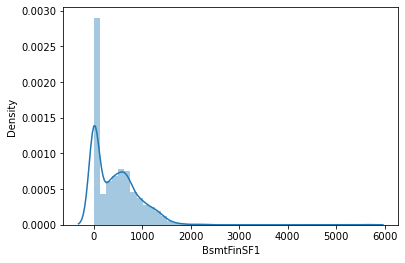

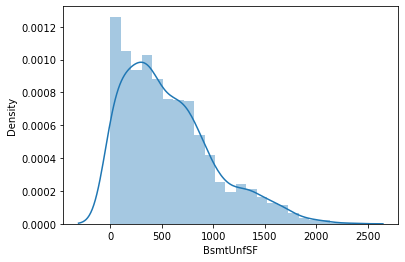

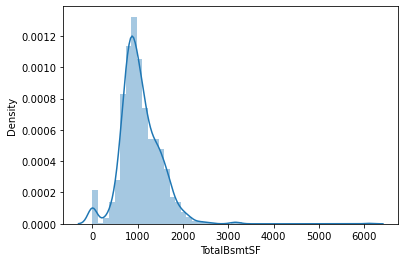

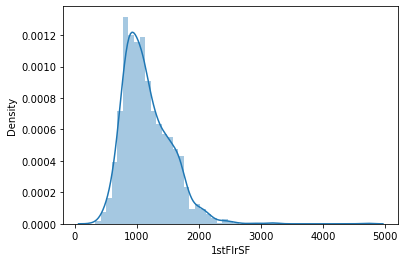

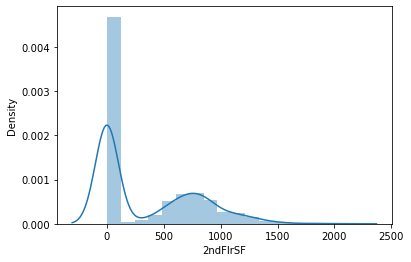

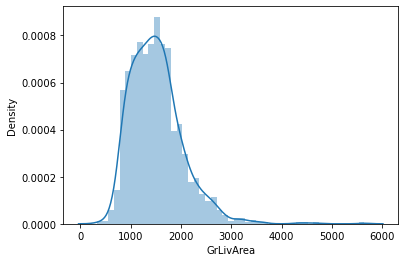

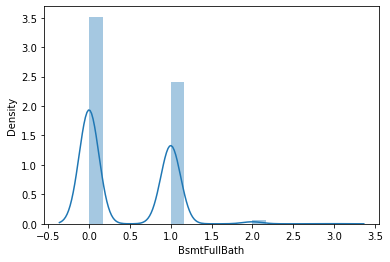

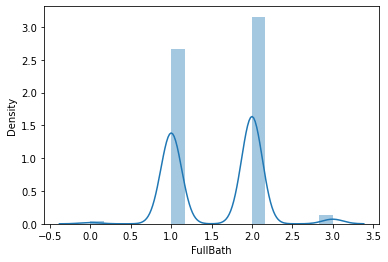

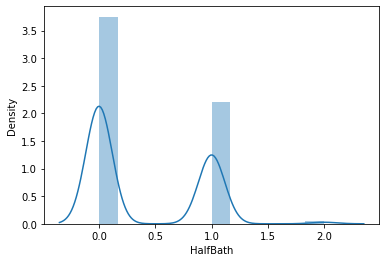

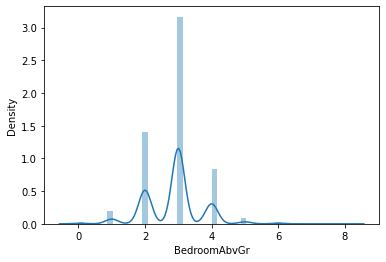

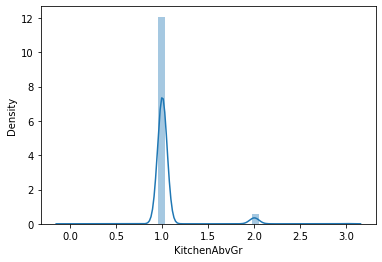

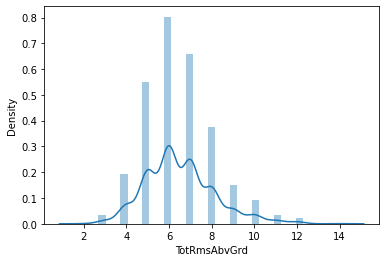

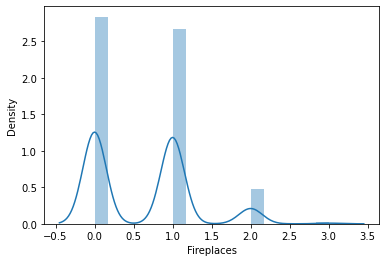

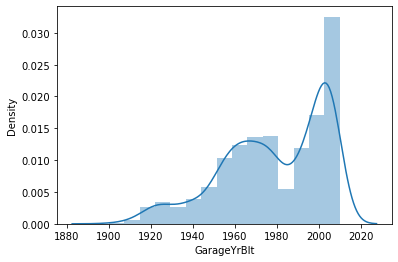

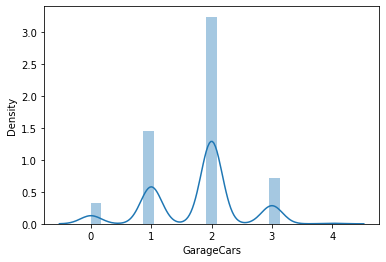

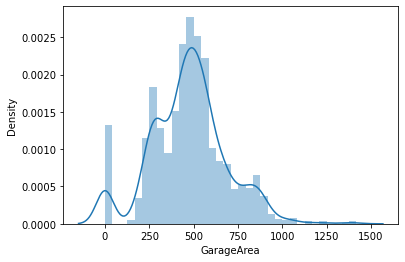

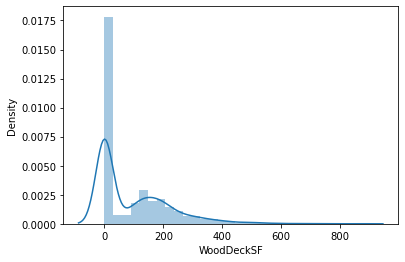

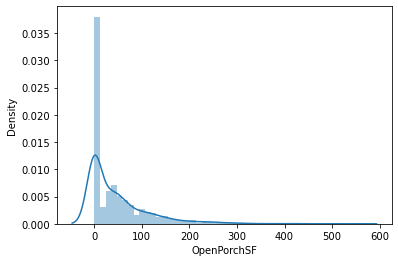

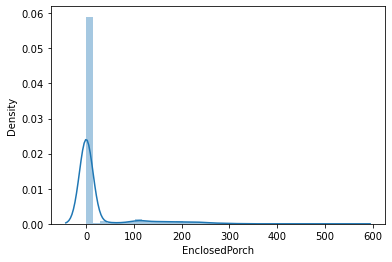

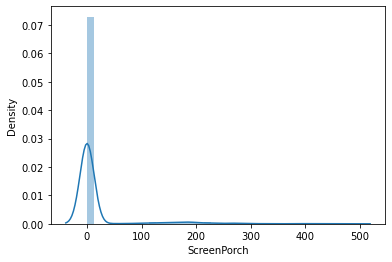

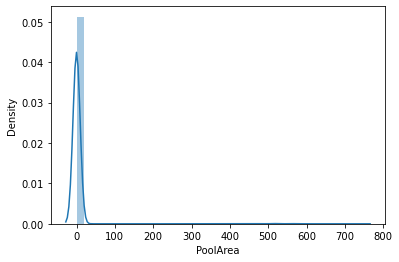

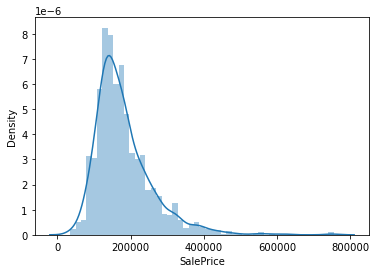

In [10]:
for i, col in enumerate(pdf.columns):
    plt.figure(i)
    sns.distplot(pdf[col])

In [11]:
# based on the above, I've decided to cut off the lotArea above 50,000
desported = df_high_corr[df_high_corr.LotArea < 50000].reset_index(drop=True).copy()
desported

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
5             50       RL         85.0    14115   Pave      IR1         Lvl   
6             20       RL         75.0    10084   Pave      Reg         Lvl   
7             60       RL          NaN    10382   Pave      IR1         Lvl   
8             50       RM         51.0     6120   Pave      Reg         Lvl   
9            190       RL         50.0     7420   Pave      Reg         Lvl   
10            20       RL         70.0    11200   Pave      Reg         Lvl   
11            60       RL         85.0    11924   Pave      IR1         Lvl   
12            20       RL          NaN    12968   Pave      IR2         Lvl   
13            20       RL         91.0    10652   Pave      IR1         Lvl   
14            20       RL          NaN    10920   Pave      IR1         Lvl   
15            45       RM         51.0     6120   Pave      Reg         Lvl   
16            20       RL          NaN    11241   Pave      IR1         Lvl   
17            90       RL         72.0    10791   Pave      Reg         Lvl   
18            20       RL         66.0    13695   Pave      Reg         Lvl   
19            20       RL         70.0     7560   Pave      Reg         Lvl   
20            60       RL        101.0    14215   Pave      IR1         Lvl   
21            45       RM         57.0     7449   Pave      Reg         Bnk   
22            20       RL         75.0     9742   Pave      Reg         Lvl   
23           120       RM         44.0     4224   Pave      Reg         Lvl   
24            20       RL          NaN     8246   Pave      IR1         Lvl   
25            20       RL        110.0    14230   Pave      Reg         Lvl   
26            20       RL         60.0     7200   Pave      Reg         Lvl   
27            20       RL         98.0    11478   Pave      Reg         Lvl   
28            20       RL         47.0    16321   Pave      IR1         Lvl   
29            30       RM         60.0     6324   Pave      IR1         Lvl   
30            70  C (all)         50.0     8500   Pave      Reg         Lvl   
31            20       RL          NaN     8544   Pave      IR1         Lvl   
32            20       RL         85.0    11049   Pave      Reg         Lvl   
33            20       RL         70.0    10552   Pave      IR1         Lvl   
34           120       RL         60.0     7313   Pave      Reg         Lvl   
35            60       RL        108.0    13418   Pave      Reg         Lvl   
36            20       RL        112.0    10859   Pave      Reg         Lvl   
37            20       RL         74.0     8532   Pave      Reg         Lvl   
38            20       RL         68.0     7922   Pave      Reg         Lvl   
39            90       RL         65.0     6040   Pave      Reg         Lvl   
40            20       RL         84.0     8658   Pave      Reg         Lvl   
41            20       RL        115.0    16905   Pave      Reg         Lvl   
42            85       RL          NaN     9180   Pave      IR1         Lvl   
43            20       RL          NaN     9200   Pave      IR1         Lvl   
44            20       RL         70.0     7945   Pave      Reg         Lvl   
45           120       RL         61.0     7658   Pave      Reg         Lvl   
46            50       RL         48.0    12822   Pave      IR1         Lvl   
47            20       FV         84.0    11096   Pave      Reg         Lvl   
48           190       RM         33.0     4456   Pave      Reg         Lvl   
49            20       RL         66.0     7742   Pave  

### 5. drop categorical columns with low price correlation

In [12]:
#select object is to select strings, which is to select category columns
category_columns = desported.select_dtypes(include=object).columns

# looked for single level columns and found none

low_corr_cat_columns=[]
for c in category_columns:
    average_price = desported.groupby(c).mean()['SalePrice']
    correlation = 1 - average_price.min()/average_price.max()
#     print (c, correlation)
    
    if correlation < 0.15:
        low_corr_cat_columns.append(c)

low_corr_cat_columns

['LandSlope']

In [13]:
# dummification
dummified_df = pd.get_dummies(desported.drop(['LandSlope'], axis = 1), drop_first=True)

### 6. deal with nulls, all in numeric columns

In [14]:
#find columns w/ null values
dummified_df.isna().sum().sort_values(ascending= False)

LotFrontage              253
GarageYrBlt               81
MasVnrArea                 8
MSSubClass                 0
BsmtQual_TA                0
ExterCond_Fa               0
ExterCond_Gd               0
ExterCond_Po               0
ExterCond_TA               0
Foundation_CBlock          0
Foundation_PConc           0
Foundation_Slab            0
Foundation_Stone           0
Foundation_Wood            0
BsmtQual_Fa                0
BsmtQual_Gd                0
BsmtCond_Gd                0
ExterQual_Gd               0
BsmtCond_Po                0
BsmtCond_TA                0
BsmtExposure_Gd            0
BsmtExposure_Mn            0
BsmtExposure_No            0
BsmtFinType1_BLQ           0
BsmtFinType1_GLQ           0
BsmtFinType1_LwQ           0
BsmtFinType1_Rec           0
BsmtFinType1_Unf           0
BsmtFinType2_BLQ           0
ExterQual_TA               0
MasVnrType_Stone           0
ExterQual_Fa               0
BsmtFinType2_LwQ           0
Exterior1st_Plywood        0
Exterior1st_St

In [15]:
# LotFrontage
# GarageYrBlt
# MasVnrArea 


# avg
mean = dummified_df["LotFrontage"].mean()

#NA refill (replace NA by average)

dummified_df["LotFrontage"] = dummified_df["LotFrontage"].fillna(value=mean)

# # ----------------------------

# # avg
yr_blt_mean = round(dummified_df["GarageYrBlt"].mean())

# #NA refill (replace NA by average)

dummified_df["GarageYrBlt"] = dummified_df["GarageYrBlt"].fillna(value=yr_blt_mean)
dummified_df["GarageYrBlt"] 

# #----------------------------------
# #drop # MasVnrArea 

dummified_df = dummified_df.dropna(subset=["MasVnrArea"])

### 7. modeling

In [16]:
#
X = dummified_df.drop(columns="SalePrice")

# take out y

y = dummified_df["SalePrice"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X.reset_index(drop=True), y.reset_index(drop=True), test_size=0.2, random_state=42)

In [18]:
#Linear Regression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train/fit the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
# print("Coefficients: \n", regr.coef_)

# The root mean squared error
print("Root mean squared error: %.2f" % (mean_squared_error(y_test, y_pred))**0.5)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Root mean squared error: 34854.74
Coefficient of determination: 0.72
